<a href="https://colab.research.google.com/github/EgorKosarevv/MachineLearning/blob/main/DZ(23_11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Косарев Егор, 3821Б1ФИ2

С данными датасета, выбранного для домашнего задания №1, решить задачу кластеризации 3 методами: KMeans, DBSCAN и любым другим на выбор. Сделать выводы.

In [40]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np
from sklearn.model_selection import GridSearchCV

In [4]:
path = kagglehub.dataset_download("mhmdkardosha/premier-league-matches")

print("Path to dataset files:", path)

100%|██████████| 142k/142k [00:00<00:00, 45.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mhmdkardosha/premier-league-matches/versions/1


In [5]:
#Загрузка данных
file_path = '/root/.cache/kagglehub/datasets/mhmdkardosha/premier-league-matches/versions/1/matches.csv'
data = pd.read_csv(file_path)
print(data.shape)

(4788, 28)


In [6]:
# Заполнение пропусков
data.loc[:, 'attendance'] = data['attendance'].fillna(data['attendance'].mean())
data.loc[:, 'dist'] = data['dist'].fillna(data['dist'].mean())
data.drop(columns=['notes'], inplace=True)

In [7]:
# Преобразвование категориальных признаков в числовые
label_encoder = LabelEncoder()
data['team'] = label_encoder.fit_transform(data['team'])
data['opponent'] = label_encoder.fit_transform(data['opponent'])

In [10]:
# Выбираем числовые признаки для кластеризации и нормализуем
X_cluster = data[['gf', 'ga', 'xg', 'xga', 'poss']]
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

In [20]:
true_labels = data['result']

Best KMeans parameters: {'n_clusters': 3, 'init': 'k-means++'}
Best Silhouette Score (KMeans): 0.2295082387430261
Best ARI (KMeans): 0.19069406134516792


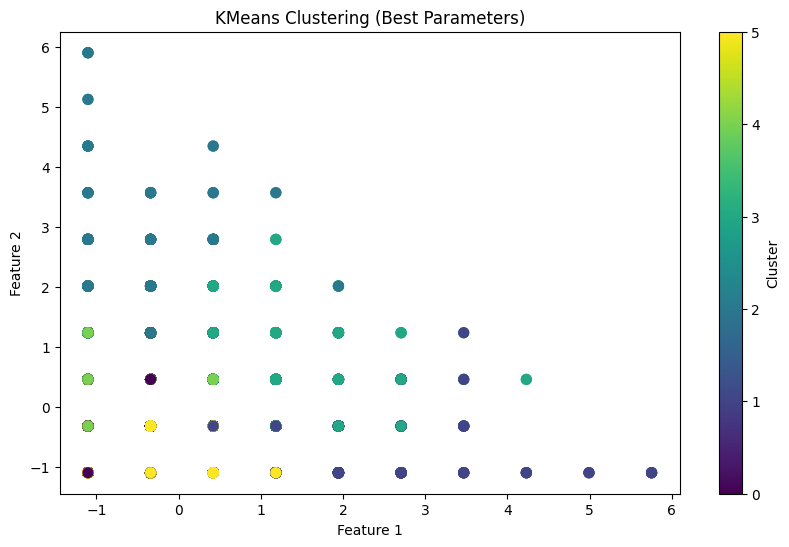

In [45]:
kmeans_param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init': ['k-means++', 'random']
}

# Функция для перебора параметров KMeans
best_kmeans_silhouette = -1
best_kmeans_ari = -1
best_kmeans_params = {}

for n_clusters in kmeans_param_grid['n_clusters']:
    for init in kmeans_param_grid['init']:
        kmeans = KMeans(n_clusters=n_clusters, init=init, random_state=42)
        kmeans_labels = kmeans.fit_predict(X_cluster_scaled)

        # Вычисляем оценку силуэта и ARI
        silhouette = silhouette_score(X_cluster_scaled, kmeans_labels)
        ari = adjusted_rand_score(true_labels, kmeans_labels)  # ARI
        if silhouette > best_kmeans_silhouette:
            best_kmeans_silhouette = silhouette
            best_kmeans_ari = ari
            best_kmeans_params = {'n_clusters': n_clusters, 'init': init}

# Выводим лучшие параметры и оценки для KMeans
print("Best KMeans parameters:", best_kmeans_params)
print("Best Silhouette Score (KMeans):", best_kmeans_silhouette)
print("Best ARI (KMeans):", best_kmeans_ari)

plt.figure(figsize=(10, 6))
plt.scatter(X_cluster_scaled[:, 0], X_cluster_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("KMeans Clustering (Best Parameters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

Best DBSCAN parameters: {'eps': 1.0, 'min_samples': 7}
Best Silhouette Score (DBSCAN): 0.3954123199432006
Best ARI (DBSCAN): -0.0027877350554651853


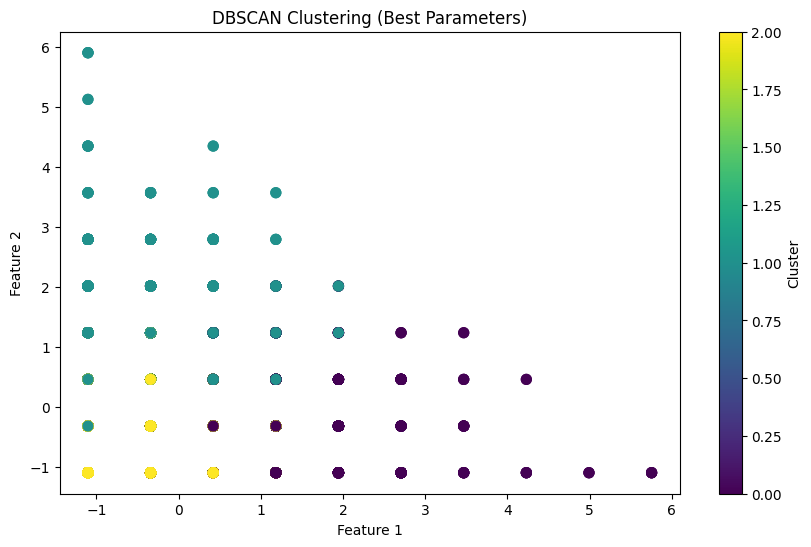

In [43]:
dbscan_param_grid = {
    'eps': [0.1, 0.3, 0.5, 0.7, 1.0],
    'min_samples': [3, 5, 7, 10]
}

best_dbscan_silhouette = -1
best_dbscan_ari = -1
best_dbscan_params = {}

for eps in dbscan_param_grid['eps']:
    for min_samples in dbscan_param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_cluster_scaled)

        # Проверяем, что кластеризация не содержит только шум (-1)
        if len(np.unique(dbscan_labels)) > 1:
            silhouette = silhouette_score(X_cluster_scaled, dbscan_labels)
            ari = adjusted_rand_score(true_labels, dbscan_labels)  # ARI
            if silhouette > best_dbscan_silhouette:
                best_dbscan_silhouette = silhouette
                best_dbscan_ari = ari
                best_dbscan_params = {'eps': eps, 'min_samples': min_samples}

# Выводим лучшие параметры и оценки для DBSCAN
print("Best DBSCAN parameters:", best_dbscan_params)
print("Best Silhouette Score (DBSCAN):", best_dbscan_silhouette)
print("Best ARI (DBSCAN):", best_dbscan_ari)

plt.figure(figsize=(10, 6))
plt.scatter(X_cluster_scaled[:, 0], X_cluster_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering (Best Parameters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

Best Agglomerative parameters: {'n_clusters': 3}
Best Silhouette Score (Agglomerative): 0.18052560593361064
Best ARI (Agglomerative): 0.23851853749231197


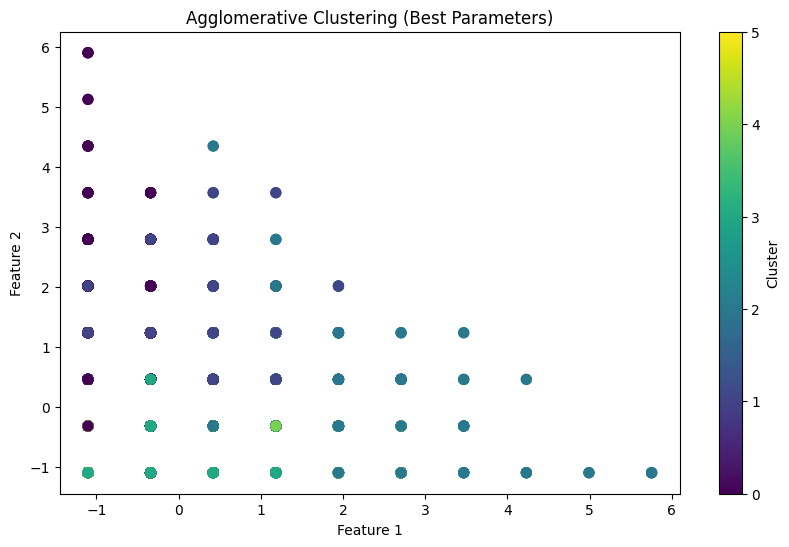

In [47]:
agg_param_grid = {
    'n_clusters': [3, 4, 5, 6]
}

# Функция для перебора параметров Agglomerative Clustering
best_agg_silhouette = -1
best_agg_ari = -1
best_agg_params = {}

for n_clusters in agg_param_grid['n_clusters']:
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_cluster.fit_predict(X_cluster_scaled)

    # Вычисляем оценку силуэта и ARI
    silhouette = silhouette_score(X_cluster_scaled, agg_labels)
    ari = adjusted_rand_score(true_labels, agg_labels)  # ARI
    if silhouette > best_agg_silhouette:
        best_agg_silhouette = silhouette
        best_agg_ari = ari
        best_agg_params = {'n_clusters': n_clusters}

# Выводим лучшие параметры и оценки для Agglomerative Clustering
print("Best Agglomerative parameters:", best_agg_params)
print("Best Silhouette Score (Agglomerative):", best_agg_silhouette)
print("Best ARI (Agglomerative):", best_agg_ari)

# Визуализация кластеров
plt.figure(figsize=(10, 6))
plt.scatter(X_cluster_scaled[:, 0], X_cluster_scaled[:, 1], c=agg_labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering (Best Parameters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

Вывод:

KMeans:

Лучшие параметры: n_clusters = 3, init = 'k-means++'.

Оценка силуэта: 0.2295.

Оценка ARI: 0.1907.

KMeans показал умеренный результат. Оценка силуэта 0.2–0.3 указывает на среднее качество кластеризации. Оценка ARI 0.1907 близка к случайному назначению меток (ARI = 0), что говорит о слабом соответствии предсказанных кластеров и истинных меток. Это может быть связано с тем, что данные не имеют четкой сферической структуры, которую предполагает KMeans.

DBSCAN:

Лучшие параметры: eps = 1.0, min_samples = 7.

Оценка силуэта: 0.3954.

Оценка ARI: -0.0028.

DBSCAN показал наилучшую оценку силуэта среди всех методов (0.3954), что указывает на хорошее разделение кластеров. Однако оценка ARI очень низкая (-0.0028), что близко к случайному назначению меток. Это может быть связано с тем, что DBSCAN выделил кластеры, которые не соответствуют истинным меткам, или данные имеют сложную структуру, которую DBSCAN не смог корректно отобразить.

Agglomerative Clustering:

Лучшие параметры: n_clusters = 3.

Оценка силуэта: 0.1805.

Оценка ARI: 0.2385.

Agglomerative Clustering показал самый низкий результат по силуэту (0.1805), что указывает на плохое качество кластеризации. Однако оценка ARI (0.2385) немного выше, чем у KMeans и DBSCAN, что говорит о лучшем соответствии предсказанных кластеров и истинных меток. Это может быть связано с тем, что Agglomerative Clustering лучше справляется с данными, которые имеют иерархическую структуру.

Итог:

DBSCAN показал наилучшую оценку силуэта (0.3954), что указывает на хорошее разделение кластеров, но его ARI (-0.0028) очень низкая, что говорит о слабом соответствии с истинными метками.

Agglomerative Clustering показал лучшую оценку ARI (0.2385), что указывает на лучшее соответствие с истинными метками, но его оценка силуэта (0.1805) самая низкая, что говорит о плохом разделении кластеров.

KMeans показал средние результаты как по силуэту (0.2295), так и по ARI (0.1907), что делает его менее предпочтительным по сравнению с DBSCAN и Agglomerative Clustering.